In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np 
from collections import Counter
from Bio import SeqIO

In [6]:
# read in the metadata 
metadata = pd.read_csv('../metadata/residual_community_metadata.csv')

In [7]:
# read in the checkm2 quality report
checkm2 = pd.read_csv('../data/MAGs/quality_report.tsv', sep = '\t')

In [8]:
checkm2_completeness70 = checkm2[checkm2['Completeness'] > 70]
checkm2_completeness70_contamination15 = checkm2_completeness70[checkm2_completeness70['Contamination'] < 15]

In [9]:
checkm2_completeness70_contamination15

,Name,Completeness,Contamination,Completeness_Model_Used,Translation_Table_Used,Coding_Density,Contig_N50,Average_Gene_Length,Genome_Size,GC_Content,Total_Coding_Sequences,Additional_Notes
0,S1C1,96.03,5.08,Neural Network (Specific Model),11,0.895,60454,311.881829,5502427,0.54,5272,None
15,S1C2,99.05,4.83,Gradient Boost (General Model),11,0.858,40227,310.244388,3809550,0.37,3519,None
29,S1C3,94.66,9.27,Neural Network (Specific Model),11,0.887,37251,300.340281,2092511,0.40,2063,None
35,S1C4,89.37,6.87,Neural Network (Specific Model),11,0.893,30491,294.716853,5113346,0.52,5174,None
39,S1C5,92.09,1.79,Gradient Boost (General Model),11,0.869,17918,300.205139,2377930,0.27,2296,None
41,S1C52,87.59,9.99,Neural Network (Specific Model),11,0.881,13544,301.545319,4807406,0.56,4689,None
43,S1C53,77.75,5.29,Neural Network (Specific Model),11,0.884,9985,290.647319,4002029,0.57,4066,None
47,S1C56,91.99,14.36,Neural Network (Specific Model),11,0.880,6395,269.159992,4617109,0.53,5044,None
49,S1C58,75.59,0.49,Neural Network (Specific Model),11,0.860,7887,280.096084,3783746,0.48,3882,None
53,S1C6,89.95,3.96,Neural Network (Specific Model),11,0.870,13776,281.385235,2163445,0.39,2235,None


In [10]:
# read in the taxonomy 
gtdb = pd.read_csv('../data/MAGs/gtdbtk.bac120.summary.tsv', sep = '\t')

In [11]:
gtdb[gtdb['user_genome'].isin(checkm2_completeness70_contamination15['Name'])][['user_genome', 'classification']]

,user_genome,classification
0,S1C1,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...
15,S1C2,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__T...
29,S1C3,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...
35,S1C4,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...
39,S1C5,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__P...
41,S1C52,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...
43,S1C53,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...
47,S1C56,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...
49,S1C58,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...
53,S1C6,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...


In [12]:
# read in the coverage information
koverage = pd.read_csv('../data/MAGs/sample_coverage.tsv', sep = '\t')
koverage['Contig_s'] = [re.split(':', c)[1] for c in koverage['Contig']]
koverage['bin'] = [re.split(':', c)[0] for c in koverage['Contig']]

In [13]:
koverage

,Sample,Contig,Count,RPM,RPKM,RPK,TPM,Mean,Median,Hitrate,Variance,Contig_s,bin
0,FAME000124_S38,S1C1.fna:S1Ck141_11177,895,60.220,0.9435,14.020,6.583,1.4030,0.0,0.12850,73.6700,S1Ck141_11177,S1C1.fna
1,FAME000124_S38,S1C1.fna:S1Ck141_21062,238,16.010,3.8080,56.590,26.570,5.6670,0.0,0.16670,346.8000,S1Ck141_21062,S1C1.fna
2,FAME000124_S38,S1C1.fna:S1Ck141_11370,2343,157.700,2.0120,29.900,14.040,2.9900,0.0,0.13920,164.8000,S1Ck141_11370,S1C1.fna
3,FAME000124_S38,S1C1.fna:S1Ck141_92919,64,4.306,0.4189,6.225,2.923,0.5588,0.0,0.07843,7.2390,S1Ck141_92919,S1C1.fna
4,FAME000124_S38,S1C1.fna:S1Ck141_102074,2354,158.400,1.6080,23.890,11.220,2.3900,0.0,0.16040,174.8000,S1Ck141_102074,S1C1.fna
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264272,FAME000109_S52,S1C8132.fna:S1Ck141_159088,13,2.399,0.9665,5.238,7.070,0.5417,0.0,0.25000,1.3030,S1Ck141_159088,S1C8132.fna
264273,FAME000109_S52,S1C8132.fna:S1Ck141_275597,30,5.536,1.7550,9.509,12.840,0.9677,1.0,0.58060,1.0320,S1Ck141_275597,S1C8132.fna
264274,FAME000109_S52,S1C8132.fna:S1Ck141_106688,20,3.690,1.5490,8.396,11.330,0.8696,1.0,0.56520,0.9368,S1Ck141_106688,S1C8132.fna
264275,FAME000109_S52,S1C8132.fna:S1Ck141_4647,18,3.321,1.3810,7.484,10.100,0.7500,0.0,0.33330,1.3260,S1Ck141_4647,S1C8132.fna


In [14]:
# compute the coverage of contigs by reading in the contigs file with biopython and then using the names in the headers to create a dictionaSry 
contigs = dict(SeqIO.index('../data/MAGs/final.contigs.fa', "fasta"))
contig_keys = list(contigs.keys())
contig_length = [re.split('=', contigs.get(k).description)[-1]for k in contig_keys]
contig_length_dict = dict(zip(contig_keys, contig_length))

# update the coverage table with the information
koverage['length'] = pd.to_numeric([contig_length_dict.get(c[3:]) for c in koverage['Contig_s']])
#koverage['mean.length'] = pd.to_numeric(koverage['length']).multiply(pd.to_numeric(koverage['Mean']))
koverage['mean.length'] = pd.to_numeric(koverage['length']).multiply(pd.to_numeric(koverage['RPKM'])) # changing this to the RPKM 

bin_meancoverage = koverage.groupby(['Sample','bin'])['mean.length'].sum().reset_index()
bin_length = koverage[['Contig_s', 'bin', 'length']].drop_duplicates().groupby(['bin'])['length'].sum().reset_index()
bin_length_dict = dict(zip(bin_length['bin'], bin_length['length']))
# add the new measure to the table 
bin_meancoverage['mean.length/bin_length'] = [bin_meancoverage.loc[index]['mean.length']/bin_length_dict.get(s) for index, s in enumerate(bin_meancoverage['bin'])]

bin_meancoverage['bin'] = [b[:-4] for b in bin_meancoverage['bin']]
bin_meancoverage_complete = bin_meancoverage[bin_meancoverage['bin'].isin(checkm2_completeness70_contamination15['Name'].to_list())]
gtdb_dict = dict(zip(gtdb['user_genome'], gtdb['classification']))
bin_meancoverage_complete['classification'] = [gtdb_dict.get(b) for b in bin_meancoverage_complete['bin']]
bin_meancoverage_complete['Sample'] = [s[:-4] for s in bin_meancoverage_complete['Sample']] 
order_dict = dict(zip(metadata['FAME ID (leave blank)'], metadata['Order']))
bin_meancoverage_complete['order'] = [order_dict[s] for s in bin_meancoverage_complete['Sample']]
bin_meancoverage_complete = bin_meancoverage_complete.sort_values('order')
#bin_meancoverage_complete['label'] = [bin_meanrp_complete['bin'].iloc[index] + ';' + re.split(';', s)[-3][3:] + ';'+ re.split(';', s)[-1][3:] for index, s  in enumerate(bin_meanrpkm_complete['classification'])] 

<ipython-input-14-91a9d30b5cf2>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_meancoverage_complete['classification'] = [gtdb_dict.get(b) for b in bin_meancoverage_complete['bin']]
<ipython-input-14-91a9d30b5cf2>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_meancoverage_complete['Sample'] = [s[:-4] for s in bin_meancoverage_complete['Sample']]
<ipython-input-14-91a9d30b5cf2>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [15]:
# loop to generate labels: 
labels = [] 

for index, s in enumerate(bin_meancoverage_complete['classification']): 
    
    species = re.split(';', s)[-1][3:]
    label = '' 
    
    if species == '': 
        genus = re.split(';', s)[-2][3:]
        
        if genus == '': 
            family = re.split(';', s)[-3][3:]
            
            if family == '': 
                label = 'unknown' 
            
            elif family == 'GPF-1':
                order = re.split(';', s)[-4][3:] 
                label = order + ' ' + family + ' sp.'
            
            else: 
                label = family + ' sp.'
        
        else: 
            label = genus + ' sp.'
    
    elif 'RHBSTW-00994' in species: 
        family = re.split(';', s)[-3][3:] 
        label = family + ' RHBSTW-00994 sp.' 
    else: 
        label = species 
    
    labels.append(bin_meancoverage_complete['bin'].iloc[index] + '; ' + label) 
    
bin_meancoverage_complete['label'] = labels


 Look at different color schemes for the heatmap. Try tearing the band away from the other samples 

In [16]:
# just make this heatmap in R using the pheatmap package 
df = bin_meancoverage_complete.pivot(index = 'label', columns = 'Sample', values = 'mean.length/bin_length')
df = df[metadata['FAME ID (leave blank)']]
df['species'] = [s for s in df.index]
df = df.sort_values('species', ascending=False).drop('species', axis=1)
df.fillna(0).to_csv('../output_files/MAG_abundance_residual.csv')

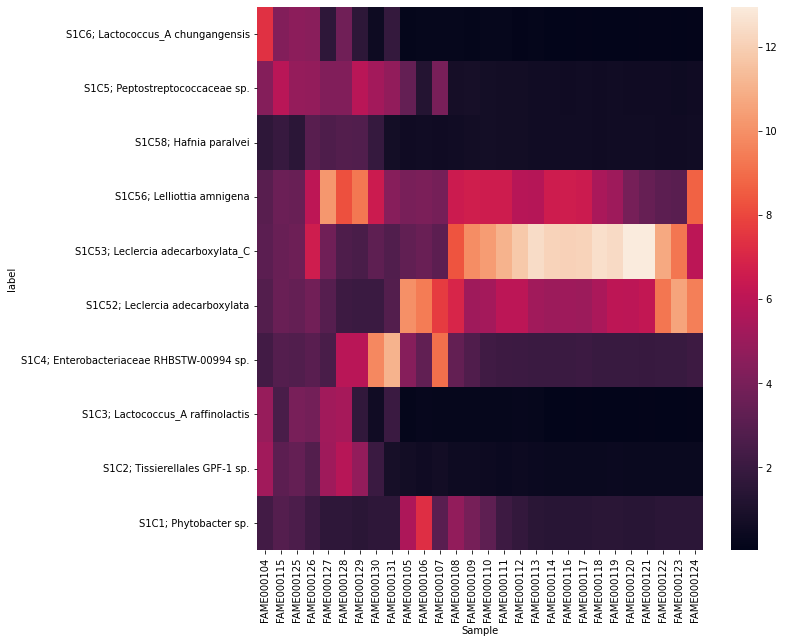

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(np.sqrt(df[df.columns[:-1]]))
plt.show()
